In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:

df = pd.read_csv('data/raw/ai.csv')
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset shape: (340, 23)

First 5 rows:


,user_id,gender,age_group,country,profession,education_level,tech_experience_level,ai_tool_primary,purpose_of_ai_use,hours_spent_per_day_on_ai,frequency_of_use_weekly,months_using_ai,task_complexity_level,verification_frequency,confidence_in_ai_outputs,critical_thinking_self_rating,privacy_awareness_level,shares_personal_info_with_ai,reads_ai_related_news,critical_thinking_risk_score,ai_overdependence_risk,incorrect_info_risk_score,privacy_concern_level
0,USER_00001,Male,26-35,USA,Software Developer,Bachelor Degree,Advanced,ChatGPT,Work Tasks,5.23,Daily,18,Complex,Often,8,7,6,Sometimes,Often,4.2,7.1,5.8,6.3
1,USER_00002,Female,18-25,Canada,Student,Some College,Intermediate,Claude,Learning,2.15,5-6 times/week,8,Moderate,Sometimes,6,8,9,Rarely,Sometimes,5.1,4.8,4.9,8.7
2,USER_00003,Male,36-45,UK,Marketing Manager,Master Degree,Intermediate,Copilot,Content Creation,3.78,Daily,14,Moderate,Always,7,9,5,Sometimes,Often,3.5,6.2,3.8,5.9
3,USER_00004,Female,46-55,Germany,Doctor,PhD,Beginner,ChatGPT,Research,1.92,3-4 times/week,6,Complex,Always,5,8,9,Never,Rarely,3.1,3.7,4.2,9.2
4,USER_00005,Non-binary,26-35,Australia,Designer,Bachelor Degree,Advanced,Midjourney,Creative Projects,4.12,Daily,22,Moderate,Often,9,6,4,Sometimes,Sometimes,4.8,6.9,5.3,4.8


In [3]:

print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Statistical Summary:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_id                        340 non-null    object 
 1   gender                         340 non-null    object 
 2   age_group                      340 non-null    object 
 3   country                        340 non-null    object 
 4   profession                     340 non-null    object 
 5   education_level                340 non-null    object 
 6   tech_experience_level          340 non-null    object 
 7   ai_tool_primary                340 non-null    object 
 8   purpose_of_ai_use              340 non-null    object 
 9   hours_spent_per_day_on_ai      340 non-null    float64
 10  frequency_of_use_weekly        340 non-null    object 
 11  months_using_ai                340 non-null    int64  
 12  task_complexity_level          340 n

,hours_spent_per_day_on_ai,months_using_ai,confidence_in_ai_outputs,critical_thinking_self_rating,privacy_awareness_level,critical_thinking_risk_score,ai_overdependence_risk,incorrect_info_risk_score,privacy_concern_level
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,4.054265,12.682353,6.673529,7.017647,5.855882,4.669706,6.188824,5.139706,6.371176
std,1.561390,5.939641,1.470217,1.768200,2.004374,1.411999,1.776990,1.361842,1.874985
min,1.650000,3.000000,4.000000,2.000000,1.000000,2.400000,2.800000,2.800000,1.600000
25%,2.775000,7.000000,6.000000,6.000000,4.000000,3.875000,4.800000,4.475000,4.975000
50%,3.890000,12.500000,7.000000,7.000000,6.000000,4.600000,6.200000,5.000000,6.700000
75%,5.340000,18.000000,8.000000,8.000000,8.000000,5.100000,7.700000,5.700000,8.000000
max,7.450000,24.000000,9.000000,9.000000,9.000000,9.400000,9.300000,9.600000,9.400000


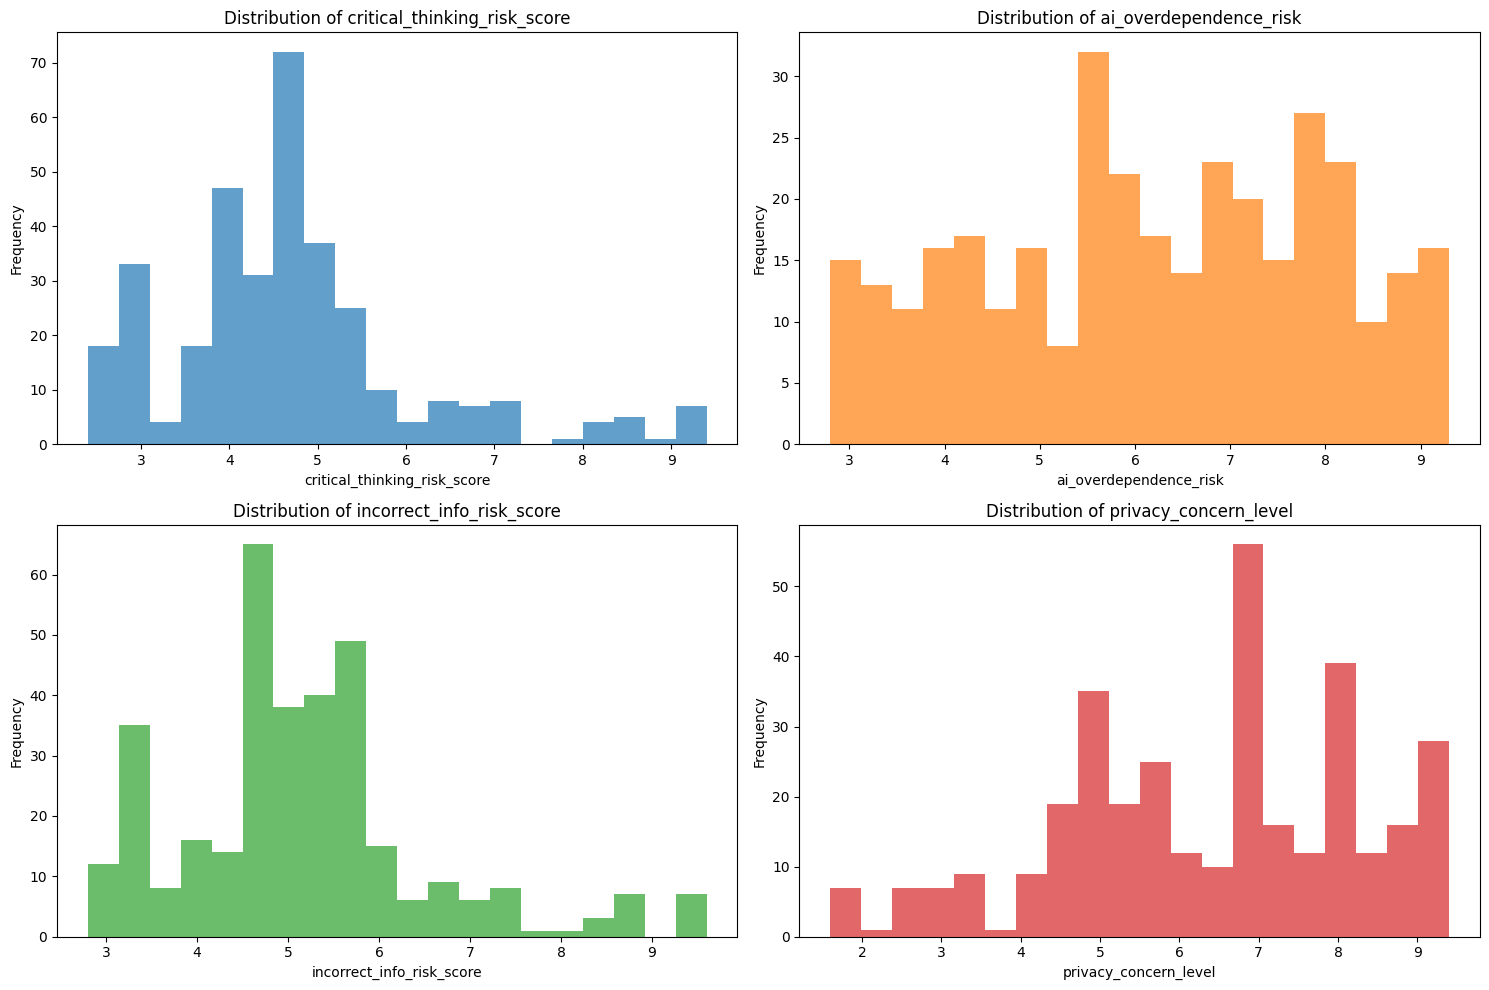

In [4]:

target_cols = ['critical_thinking_risk_score', 'ai_overdependence_risk', 'incorrect_info_risk_score', 'privacy_concern_level']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(target_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7, color=f'C{i}')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:

df_clean = df.copy()

print(f"Duplicate rows: {df_clean.duplicated().sum()}")

df_clean = df_clean.drop_duplicates()
print(f"Shape after removing duplicates: {df_clean.shape}")

Duplicate rows: 0
Shape after removing duplicates: (340, 23)


In [6]:

categorical_cols = ['gender', 'age_group', 'country', 'profession', 'education_level', 
                   'tech_experience_level', 'ai_tool_primary', 'purpose_of_ai_use', 
                   'frequency_of_use_weekly', 'task_complexity_level', 'verification_frequency',
                   'shares_personal_info_with_ai', 'reads_ai_related_news']

print("Unique values for categorical columns:")
for col in categorical_cols:
    print(f"\n{col}: {df_clean[col].unique()}")

Unique values for categorical columns:

gender: ['Male' 'Female' 'Non-binary']

age_group: ['26-35' '18-25' '36-45' '46-55' '35-45' '55-65' '25-35']

country: ['USA' 'Canada' 'UK' 'Germany' 'Australia' 'India' 'France' 'Japan'
 'Brazil' 'Mexico' 'South Korea' 'Netherlands' 'Sweden' 'Singapore' 'UAE']

profession: ['Software Developer' 'Student' 'Marketing Manager' 'Doctor' 'Designer'
 'Teacher' 'Engineer' 'Content Creator' 'Lawyer' 'Data Scientist'
 'Consultant' 'Researcher' 'Accountant' 'Writer' 'Project Manager'
 'Sales Representative' 'Entrepreneur' 'Analyst']

education_level: ['Bachelor Degree' 'Some College' 'Master Degree' 'PhD' 'High School'
 'Professional Certification']

tech_experience_level: ['Advanced' 'Intermediate' 'Beginner' 'Expert']

ai_tool_primary: ['ChatGPT' 'Claude' 'Copilot' 'Midjourney' 'Grammarly' 'Multiple Tools'
 'DALL-E' 'Perplexity' 'Jasper' 'Notion AI' 'Copy.ai']

purpose_of_ai_use: ['Work Tasks' 'Learning' 'Content Creation' 'Research' 'Creative Projects'

In [7]:

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[f'{col}_encoded'] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

print("Categorical encoding completed!")
print(f"New shape: {df_clean.shape}")

Categorical encoding completed!
New shape: (340, 36)


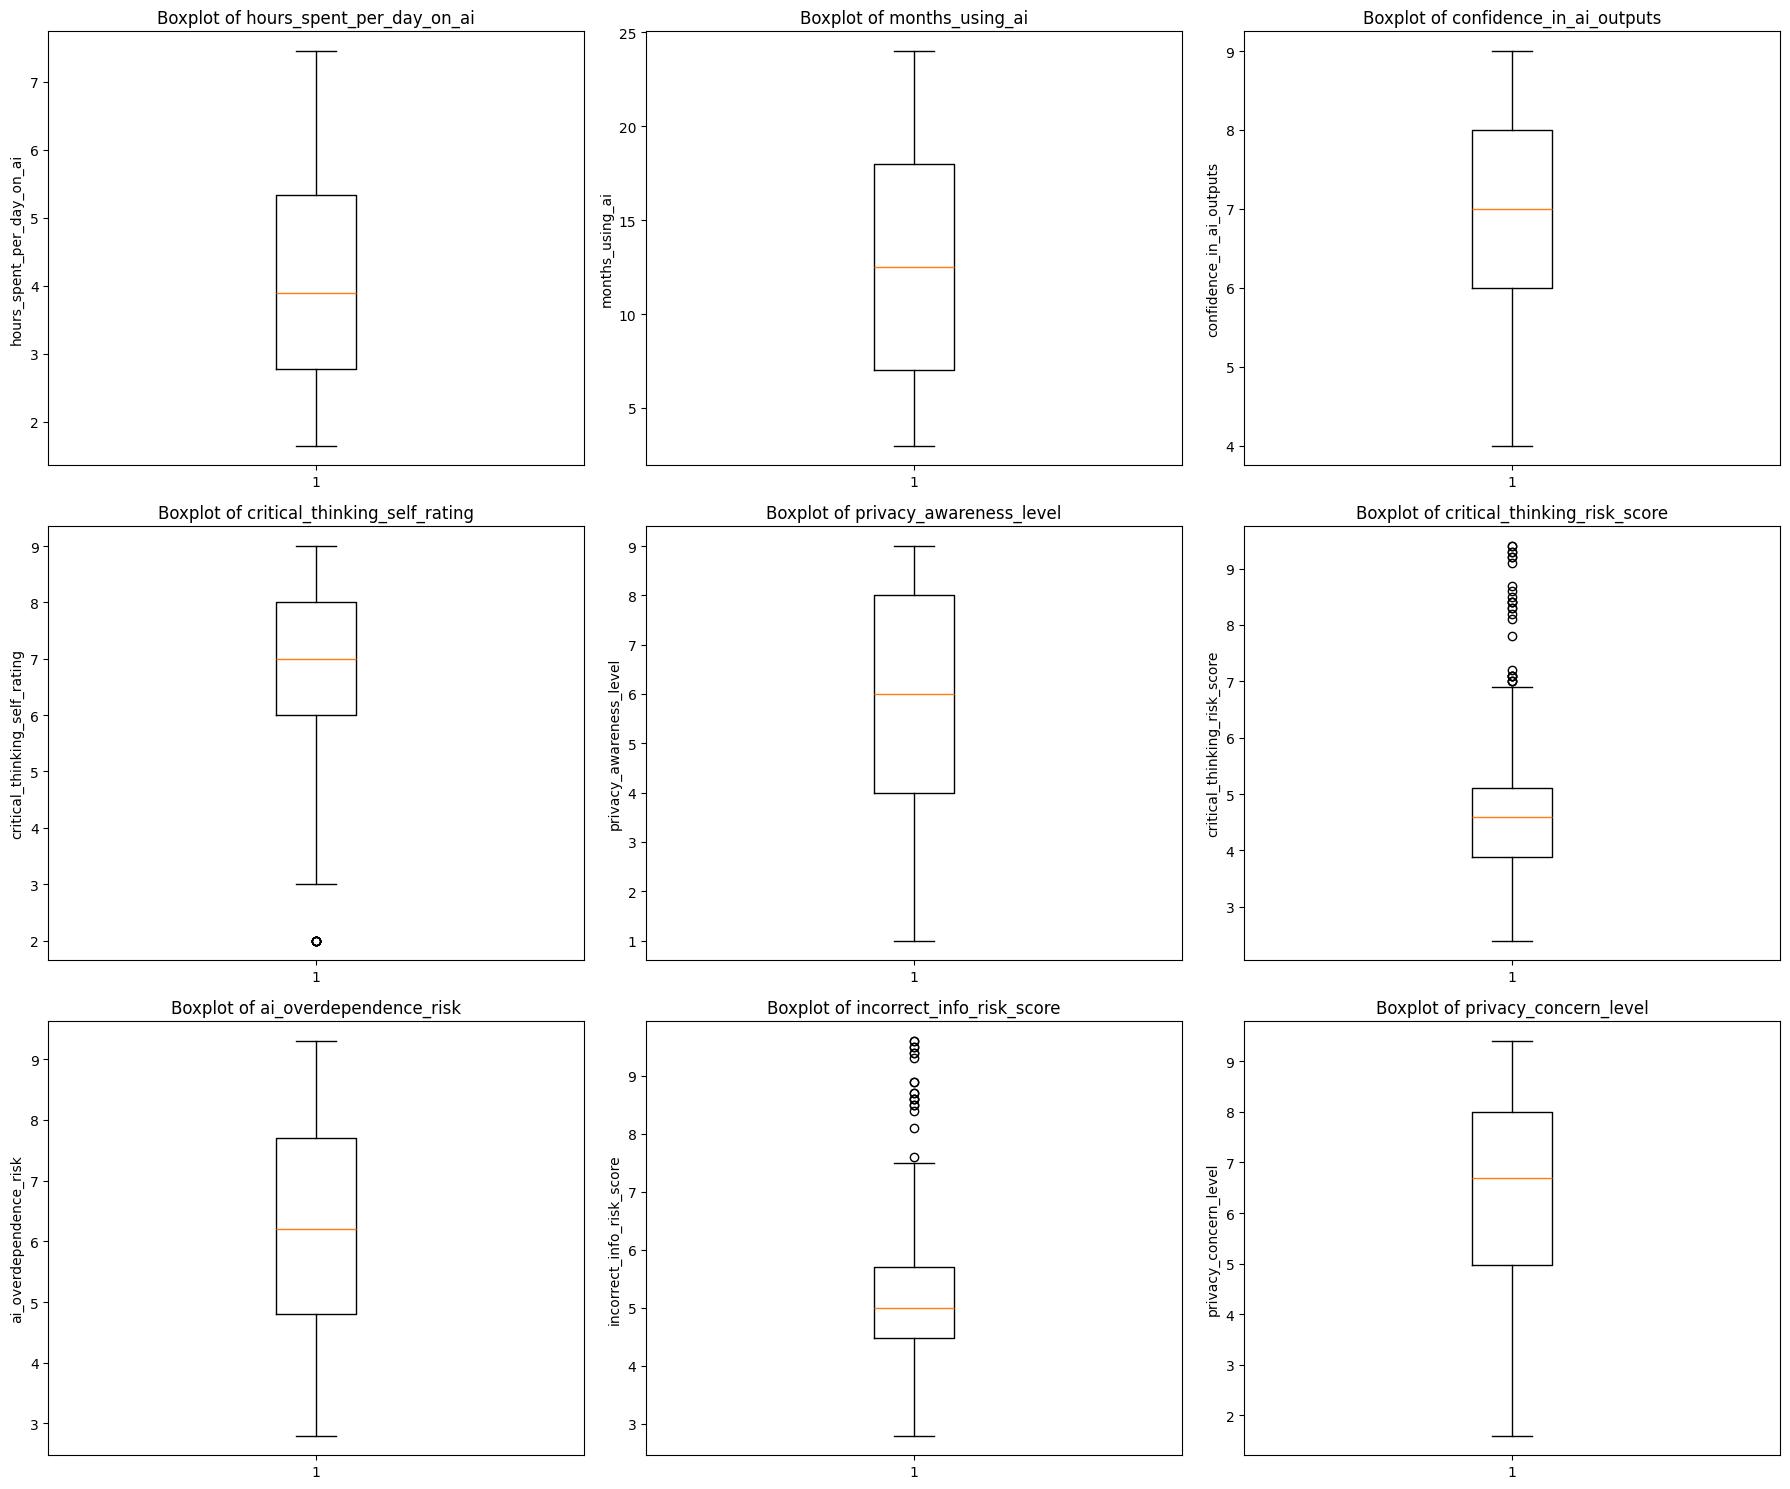

In [8]:

numerical_cols = ['hours_spent_per_day_on_ai', 'months_using_ai', 'confidence_in_ai_outputs',
                 'critical_thinking_self_rating', 'privacy_awareness_level'] + target_cols

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        axes[i].boxplot(df_clean[col])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel(col)


for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [9]:

feature_cols = (['hours_spent_per_day_on_ai', 'months_using_ai', 'confidence_in_ai_outputs',
                'critical_thinking_self_rating', 'privacy_awareness_level'] + 
               [f'{col}_encoded' for col in categorical_cols])


X = df_clean[feature_cols]
y_critical_thinking = df_clean['critical_thinking_risk_score']
y_ai_overdependence = df_clean['ai_overdependence_risk']
y_incorrect_info = df_clean['incorrect_info_risk_score']
y_privacy_concern = df_clean['privacy_concern_level']

print(f"Feature matrix shape: {X.shape}")
print(f"Features: {feature_cols}")

Feature matrix shape: (340, 18)
Features: ['hours_spent_per_day_on_ai', 'months_using_ai', 'confidence_in_ai_outputs', 'critical_thinking_self_rating', 'privacy_awareness_level', 'gender_encoded', 'age_group_encoded', 'country_encoded', 'profession_encoded', 'education_level_encoded', 'tech_experience_level_encoded', 'ai_tool_primary_encoded', 'purpose_of_ai_use_encoded', 'frequency_of_use_weekly_encoded', 'task_complexity_level_encoded', 'verification_frequency_encoded', 'shares_personal_info_with_ai_encoded', 'reads_ai_related_news_encoded']


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Feature scaling completed!")
print(f"Scaled features shape: {X_scaled_df.shape}")

Feature scaling completed!
Scaled features shape: (340, 18)


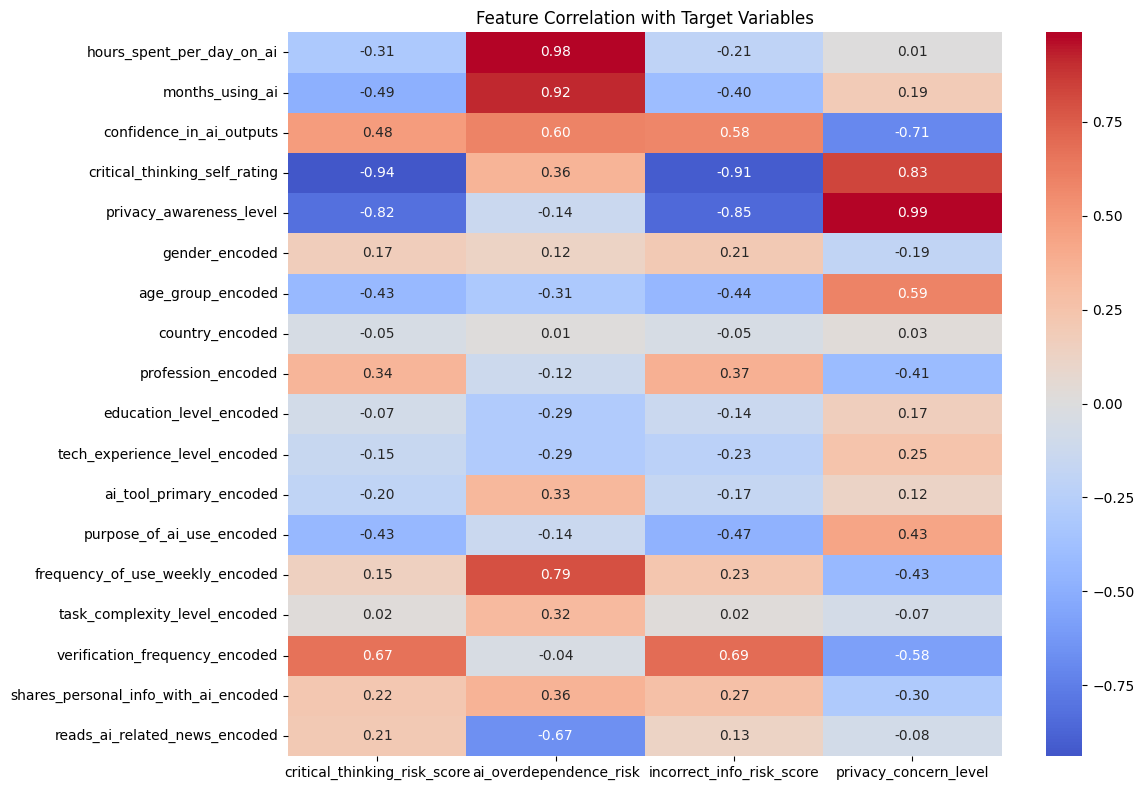

In [11]:
# Correlation matrix with target variables
corr_data = pd.concat([X_scaled_df, df_clean[target_cols]], axis=1)
correlation_matrix = corr_data.corr()

# Plot correlation heatmap for target variables
plt.figure(figsize=(12, 8))
target_corr = correlation_matrix[target_cols].drop(target_cols)
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation with Target Variables')
plt.tight_layout()
plt.show()

In [12]:

final_dataset = pd.concat([X_scaled_df, df_clean[target_cols + ['user_id']]], axis=1)
final_dataset.to_csv('data/clean/ai_cleaned.csv', index=False)
print("✅ Cleaned dataset saved to 'data/clean/ai_cleaned.csv'")

import pickle

with open('data/clean/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

with open('data/clean/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Label encoders and scaler saved!")
print(f"\nFinal dataset shape: {final_dataset.shape}")
print("\nData cleaning completed successfully!")

✅ Cleaned dataset saved to 'data/clean/ai_cleaned.csv'
✅ Label encoders and scaler saved!

Final dataset shape: (340, 23)

Data cleaning completed successfully!
